# Project description


In this project we are going to analyze Yandex.Afisha performance. We are going to study how people use the product, when they start to buy, how much revenue each customer brings and when they pay off the investment to acquire them. The aim of the project is to optimize marketing expenses.

# Step 1. Download the data and prepare it for analysis

Importing Libraries and Data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
visits= pd.read_csv("datasets/visits_log_us.csv")

costs= pd.read_csv("datasets/costs_us.csv")

orders= pd.read_csv("datasets/orders_log_us.csv")

Viewing general information of data to optimize the data for analysis and making sure each column contains the correct data type.



In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Columns End Ts, Buy Ts,dt, and Start Ts are dates and should be in datetime format.

Columns source Id, costs, Revenue, and Uid have the right data type.

Column Device contains two categories and hence would be changed from objectdata type to category

In [6]:
#reloading dataset and parsing data in the right format
visits = pd.read_csv('datasets/visits_log_us.csv', dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])

In [7]:
# checking for suplicates
visits.duplicated().sum()

0

DataFrame `visits` has not duplicated or missing values

In [8]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [10]:
#reloading dataset and parsing data in the right format
orders = pd.read_csv('datasets/orders_log_us.csv',parse_dates=['Buy Ts'])

In [11]:
# checking for suplicates
orders.duplicated().sum()

0

DataFrame `orders` has not duplicated or missing values

In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [13]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [14]:
#reloading dataset and parsing data in the right format
costs = pd.read_csv('datasets/costs_us.csv',
                  parse_dates=['dt'])

In [15]:
# checking for suplicates
costs.duplicated().sum()

0

DataFrame `costs` has not duplicated or missing values

# Step 2. Make reports and calculate metrics:


In [16]:
visits['activity_date']  = visits['Start Ts'].dt.date
visits['activity_year']  = visits['Start Ts'].astype('datetime64[Y]')
visits['activity_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['activity_week']  = visits['Start Ts'].astype('datetime64[W]')

From the `['Start Ts']` column we can obtein the date, year, month and week in which an activity by the client took place.

In [17]:
# daily active users
dau = visits.groupby('activity_date').agg({'Uid': 'nunique'})

# weekly active users
wau = visits.groupby(['activity_year', 'activity_week']).agg({'Uid': 'nunique'})

# montly active user
mau = visits.groupby(['activity_year', 'activity_month']).agg({'Uid': 'nunique'}).reset_index()

In [18]:
print('Average daily active users:', int(dau.mean()))

Average daily active users: 907


In [19]:
print('Average weekly active users:', int(wau.mean()))

Average weekly active users: 5621


In [20]:
print('Average monthly active users:', int(mau['Uid'].mean()))

Average monthly active users: 23228


### Ploting daily, weekly and monthly active users

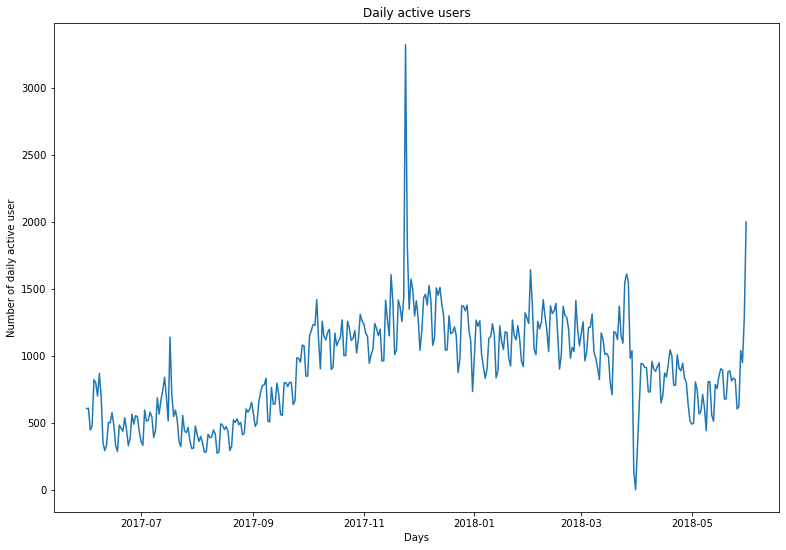

In [21]:
plt.figure(figsize=(13, 9))
plt.title('Daily active users')
plt.ylabel('Number of daily active user')
plt.xlabel('Days')
plt.plot(dau)
plt.show()

In the graph above we can see how the number of active users per day varies over time. We can see that the daily number of active users has increased compared to May 2017 but is decreasing in the last period.

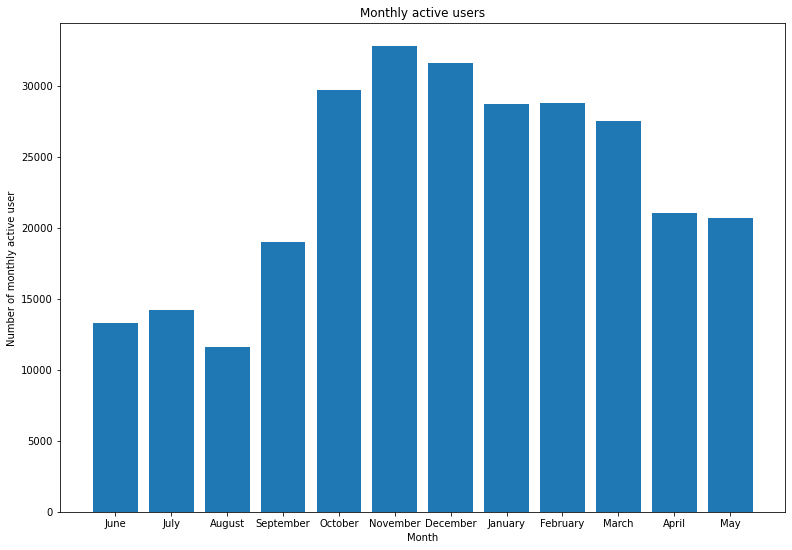

In [22]:
mau['month'] = mau['activity_month'].dt.month_name()
plt.figure(figsize=(13, 9))
plt.bar( x=mau['month'], height=mau['Uid'])
plt.title('Monthly active users')
plt.ylabel('Number of monthly active user')
plt.xlabel('Month')
plt.show()

In the graph above we can see the dynamics of monthly active users. We can confirm that visits have increased since March 2017, reaching a peak in November 2017, but are now slowly decreasing.

### Comparing number of daily user and number of daily session 

In [23]:
activity_per_day = visits.groupby('activity_date').agg({'Uid': ['count','nunique']})
activity_per_day.columns = ['n_sessions', 'n_users']
activity_per_day['activity_per_user'] = activity_per_day['n_sessions'] / activity_per_day['n_users']
print('Average daily session per user', activity_per_day['activity_per_user'].mean()) 

Average daily session per user 1.0821696440039723


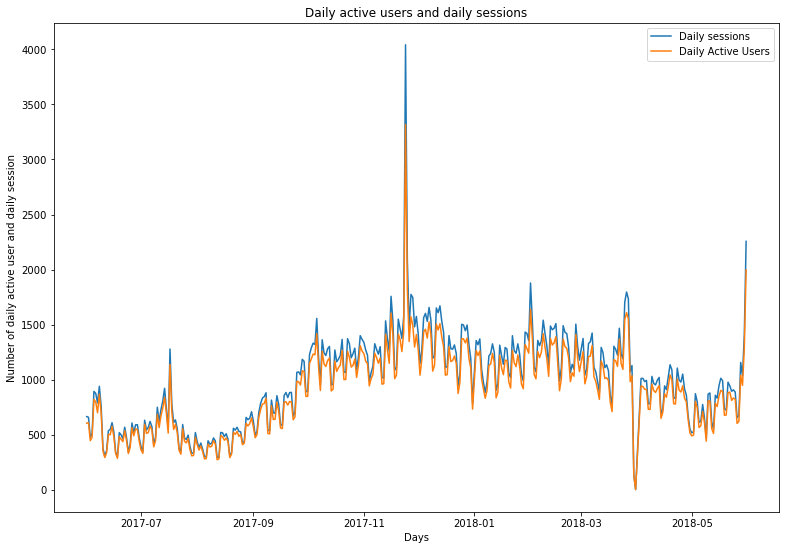

In [24]:
plt.figure(figsize=(13, 9))
plt.title('Daily active users and daily sessions')
n_sessions, = plt.plot(activity_per_day['n_sessions'], label='Sessions')
n_users, = plt.plot(activity_per_day['n_users'], label='Users')
plt.legend([n_sessions, n_users], ['Daily sessions', 'Daily Active Users'])
plt.ylabel('Number of daily active user and daily session')
plt.xlabel('Days')
plt.show()

On average each user uses the product about 1.08 times. Indeed we can see drom the graph above that number of daily users and number of dealy session have an almost identical trend.

### Monthly session by device

In [25]:
activity_per_user = visits.groupby(['Device','activity_year', 'activity_month']).agg({'Uid': ['count','nunique']})
activity_per_user.columns = ['n_sessions', 'n_users']
activity_per_user['activity_per_user'] = activity_per_user['n_sessions'] / activity_per_user['n_users']


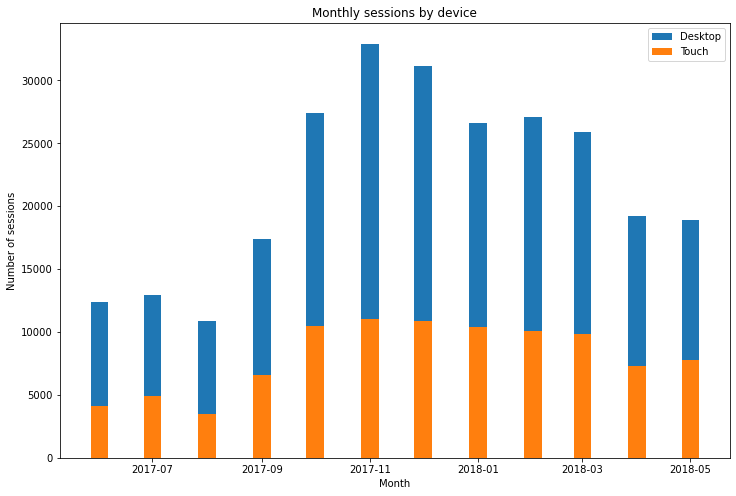

In [26]:
activity_per_user = activity_per_user.reset_index()
desktop_activity = activity_per_user[activity_per_user['Device'] == 'desktop']
touch_activity = activity_per_user[activity_per_user['Device'] == 'touch']
activity = pd.merge(desktop_activity, touch_activity, on='activity_month') 
fig, ax = plt.subplots(figsize=(12, 8))
b1 = ax.bar(activity['activity_month'], activity['n_sessions_x'], label='Desktop', width=10)
b2= ax.bar(activity['activity_month'], activity['n_sessions_y'], label='Touch', width=10)
plt.title('Monthly sessions by device')
plt.ylabel('Number of sessions')
plt.xlabel('Month')
plt.legend()
plt.show()

In the graph above we can see the trend of the monthly sessions divided by device. They have a similar trend, both have increased compared to the beginning of the observed period but are decreasing gradually.

**We can see that the number of sessions done from the desktop are much higher than those done from a touch device, in some cases more than double**.

### Activity duration

In [27]:
visits['activity_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds


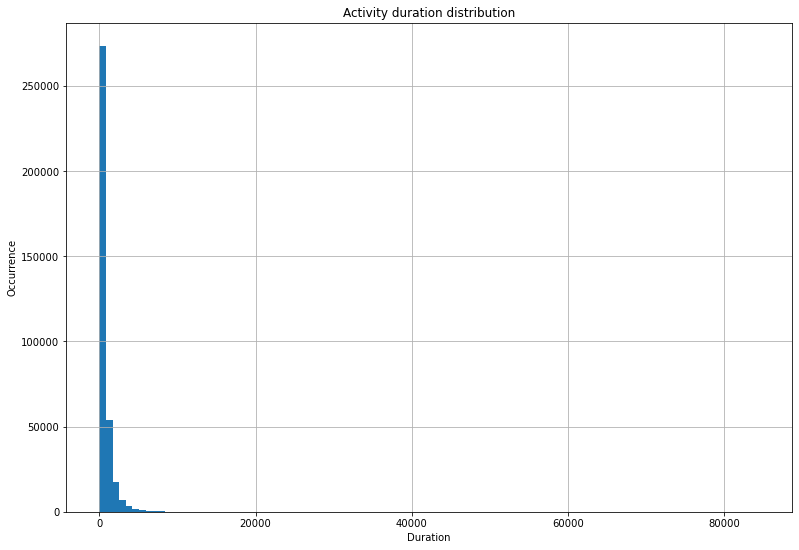

In [28]:
plt.figure(figsize=(13, 9))
visits['activity_duration_sec'].hist(bins=100)
plt.title('Activity duration distribution')
plt.xlabel('Duration')
plt.ylabel('Occurrence')
plt.show()

In [29]:
print('Average activity Lenght:', visits['activity_duration_sec'].mode()) 


Average activity Lenght: 0    60
Name: activity_duration_sec, dtype: int64


SInce the distribution of the duration in second of each session is not normal distribuited, the mode seems the best value to rappresent the central tendency.

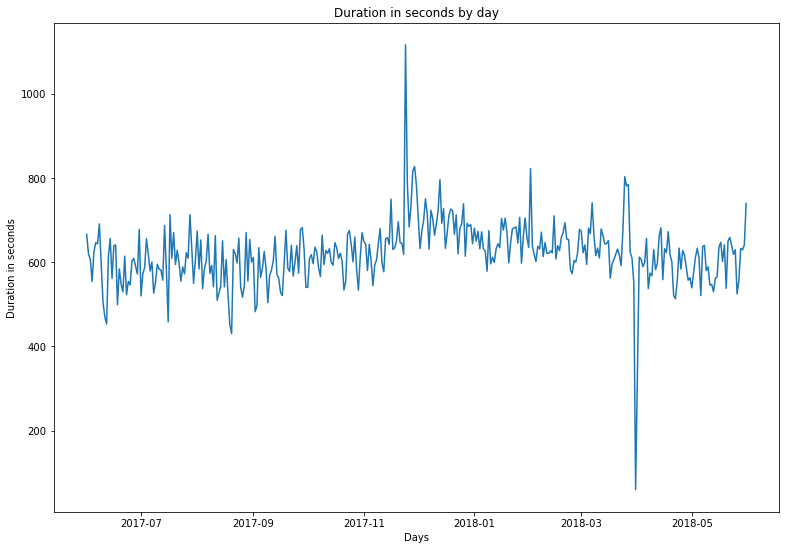

In [30]:
visits_duration = visits[['activity_date', 'activity_duration_sec']]
visits_duration = visits_duration.groupby('activity_date').agg({'activity_duration_sec':'mean'})
plt.figure(figsize=(13, 9))
plt.title('Duration in seconds by day')
plt.ylabel('Duration in seconds')
plt.xlabel('Days')
plt.plot(visits_duration)
plt.show()

The average duration of each session is very variable, but it does not appear to have increased or decreased over the period under review.

# Visualizing Cohorts:  User Retention



For each user we can determine the date of the first activity, we can use this date to divide users into cohorts and to determine the retention rate or how often users return to use the service.

In [31]:
# determining fist activity date
visits['activity_date'] = pd.to_datetime(visits['activity_date'])
first_activity_date = visits.groupby(['Uid'])['activity_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='Uid') 
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['activity_date'].astype('datetime64[M]')

The users can be divided into cohorts based on the date of the first activity

In [32]:
#creating cohorts
cohorts = visits.groupby(['first_activity_month','activity_month']).agg({'Uid':'nunique'}).reset_index()


For each cohort we can calculate the customer´s lifetime

In [33]:
cohorts["life_time"] = ((cohorts['activity_month'] - cohorts['first_activity_month']) / np.timedelta64(1,'M')).round().astype('int')

Determining the initial number of active users for each cohort

In [34]:
initial_users_count = cohorts[cohorts['life_time'] == 0][['first_activity_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 

In [35]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 


We can calculate the retention rate by dividing the number of active users each month by the initial number of users.

In [36]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users'] 


In [37]:
# creating a pivot table that will help with the visualitation
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='life_time',
                                      values='retention',aggfunc='sum')

retention_pivot.index = retention_pivot.index.strftime('%B %d, %Y, %r')

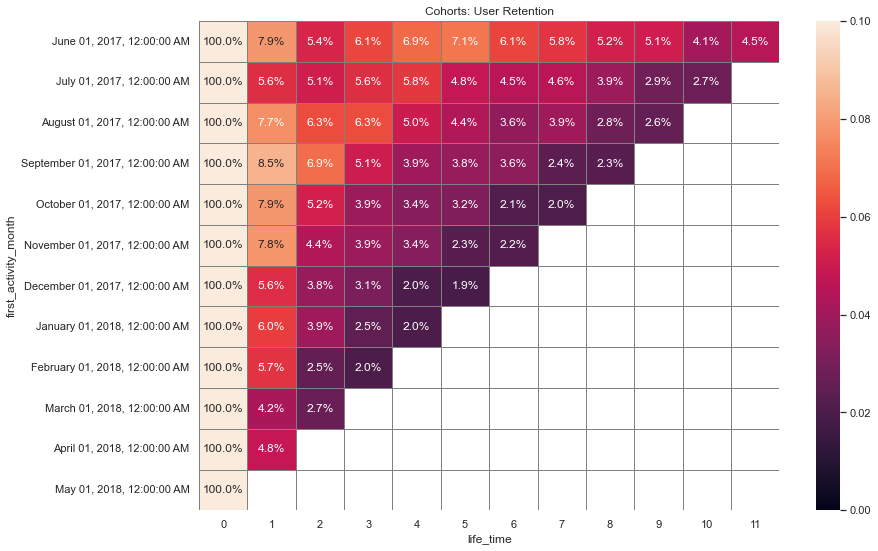

In [38]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1); 

The June 2017 cohort had the highest retention rate as at month 11 (and the only month that had a rentention rate as at month 11). By the first month (month 1), all cohorts had retention rates less than 10%.

Generally the retention rate is quite low in all cohorts and decreases over time.

We can also note that the retention rate for recent users is even lower.

# Visualizing Cohorts: Order per Month

We can determine the first order date and the first activity for each customer in order to calculate the average conversion time

In [39]:
# determining first order date for each custmer
first_order_date = orders.groupby('Uid')['Buy Ts'].min()
first_order_date.name = 'first_order_date'
# determining first order date
first_activity_date = visits.groupby('Uid')['Start Ts'].min()
first_activity_date.name = 'first_activity_date'
# creating one dataframe
merged_orders = pd.merge(first_order_date, first_activity_date, on='Uid')

In [40]:
merged_orders['conversion_time'] = merged_orders['first_order_date'] - merged_orders['first_activity_date']


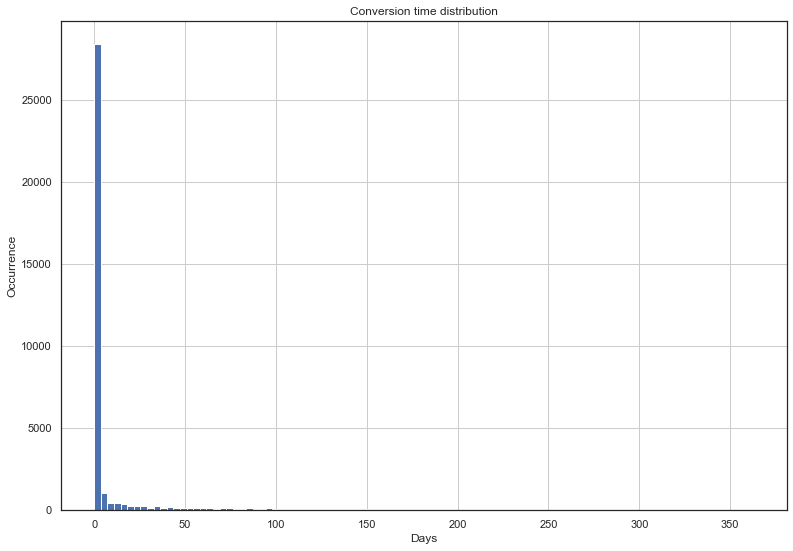

In [41]:
plt.figure(figsize=(13, 9))
merged_orders['conversion_time'] = merged_orders['conversion_time'] / np.timedelta64(1,'D')
merged_orders['conversion_time'] = merged_orders['conversion_time'].astype('int64')
merged_orders['conversion_time'].hist(bins=100)
plt.title('Conversion time distribution')
plt.xlabel('Days')
plt.ylabel('Occurrence')
plt.show()

In [42]:
print('Average Conversion Time in days:', merged_orders['conversion_time'].mode())

Average Conversion Time in days: 0    0
Name: conversion_time, dtype: int64


In the graph above we can see the distribution of the Conversion time and since it is not a normal one or close to a normal one, the mode is the value that best represents the measure of central tendency. Mostly of the uesers convert on the same day of the first activity on the website.

We van calculate the average conversion time for each cohort. Mostly of the users of each cohort conver on the first day

In [43]:
merged_orders['first_activity_month'] = merged_orders['first_activity_date'].astype('datetime64[M]')
cohorts = merged_orders.groupby('first_activity_month').agg(lambda x: pd.Series.mode(x)[0])
cohorts['conversion_time']

first_activity_month
2017-06-01    0
2017-07-01    0
2017-08-01    0
2017-09-01    0
2017-10-01    0
2017-11-01    0
2017-12-01    0
2018-01-01    0
2018-02-01    0
2018-03-01    0
2018-04-01    0
2018-05-01    0
Name: conversion_time, dtype: int64

We can also calculate the average conversion time by grouping users this time on the basis of the device used to se if there is any substantial differences.

In [44]:
merged_orders = merged_orders.reset_index()
merged_orders = merged_orders.merge(visits[['Uid','Device']], on='Uid')
cohorts = merged_orders.groupby('Device').agg(lambda x: pd.Series.mode(x)[0])
cohorts['conversion_time']

Device
desktop    0
touch      0
Name: conversion_time, dtype: int64

We can split the users into cohorts again, this time, based on the first order date and calculate the number of orders placed by each cohort in each lifetime.

In [45]:
first_order_date = orders.groupby('Uid')['Buy Ts'].min()
first_order_date.name = 'first_order_date'
orders_new = orders.merge(first_order_date, on='Uid')
orders_new['first_order_month'] = orders_new['first_order_date'].astype('datetime64[M]')
orders_new['order_month'] = orders_new['Buy Ts'].astype('datetime64[M]')
cohorts = orders_new.groupby(['first_order_month', 'order_month']).agg({'Uid':'count'}).reset_index()
cohorts["life_time"] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')

In [46]:
orders_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='life_time',
    values='Uid',
    aggfunc='sum',

)

orders_pivot.index = orders_pivot.index.strftime('%B %d, %Y, %r')

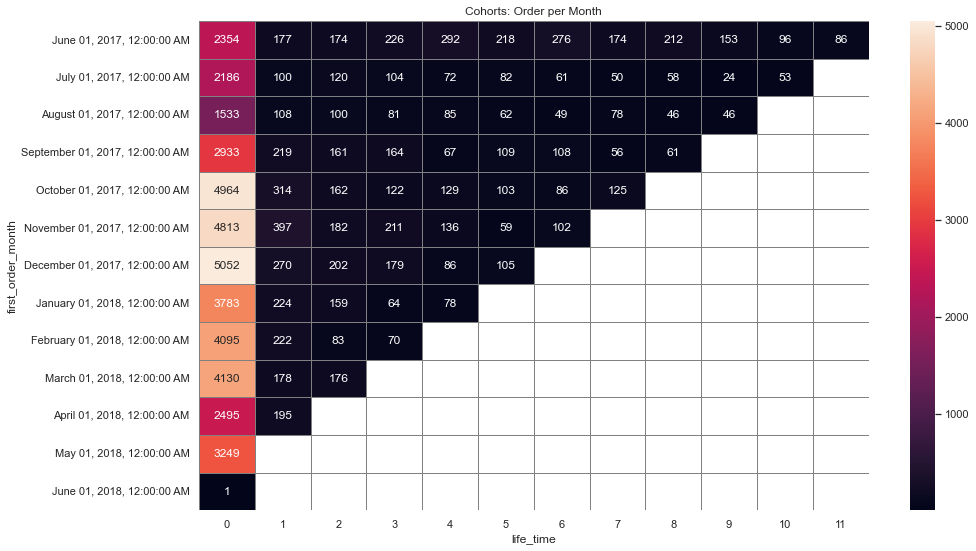

In [47]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: Order per Month')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray'); 

In the chart above we can see the number of orders placed by each cohort in each month of the lifetime. **We can see how only a few users repeat the order in the following months.**

Keeping the cohorts on the basis of the first purchase date, We can calculate the average return generated by each user belonging to each cohort.

In [48]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'Revenue':'sum', 'Uid':'nunique'}).reset_index()
cohorts['revenue_per_user'] = cohorts['Revenue']/cohorts['Uid']
cohorts["life_time"] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')

In [49]:
revenue_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='life_time',
    values='revenue_per_user',
    aggfunc='sum',
) 

revenue_pivot.index = revenue_pivot.index.strftime('%B %d, %Y, %r')

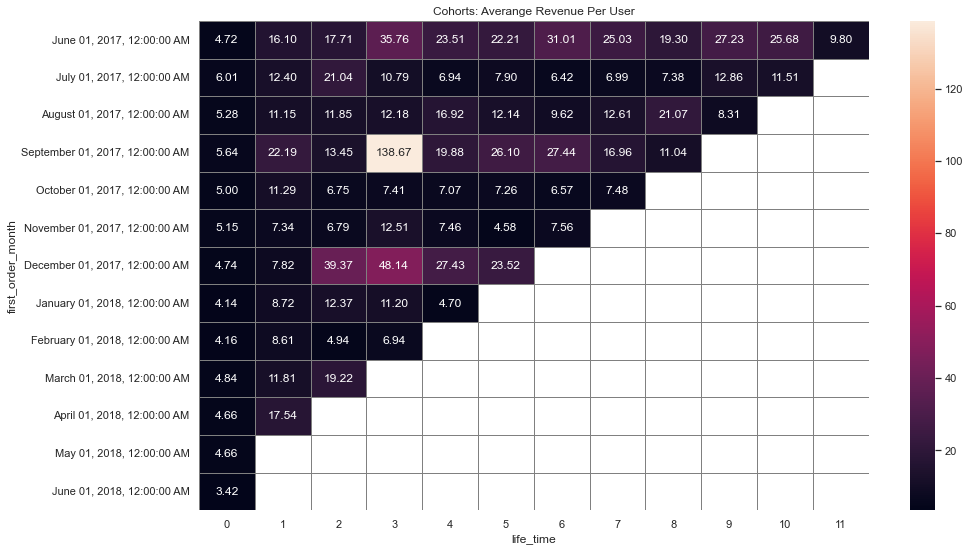

In [50]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: Averange Revenue Per User')
sns.heatmap(revenue_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray'); 

**We can notice a very interesting thing, even if there are few users who repeat an order, those who do it generate a higher average revenue, this means that they tend to spend more on subsequent orders.**

### Determining the average life time value (LTV) for each cohort


The lifetime (LTV) value is the total amount of money a customer brings to the company on average by making purchases. To calcule the LTV we need to consider also the gross profit, in this project we do not have enought data to determine it so I am going to use the average gross profit for an ecommerce: 40%

In [51]:
gross_profit = 0.4

In [52]:
cohorts_size = orders_new.groupby(['first_order_month']).agg({'Uid':'nunique'}).reset_index()
cohorts_size.columns = ['first_order_month', 'n_buyers']
cohorts_size
cohorts_revenue = orders_new.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts_ltv = pd.merge(cohorts_size, cohorts_revenue, on='first_order_month')
cohorts_ltv['life_time'] = (cohorts_ltv['order_month'] - cohorts_ltv['first_order_month'])/np.timedelta64(1, 'M')
cohorts_ltv['life_time'] = cohorts_ltv['life_time'].round().astype('int')
cohorts_ltv['gp'] = cohorts_ltv['Revenue'] * gross_profit
cohorts_ltv['LTV'] = cohorts_ltv['gp'] / cohorts_ltv['n_buyers']

In [53]:
output = cohorts_ltv.pivot_table(
    index='first_order_month', 
    columns='life_time', 
    values='LTV', 
    aggfunc='mean')

output = output.cumsum(axis=1)




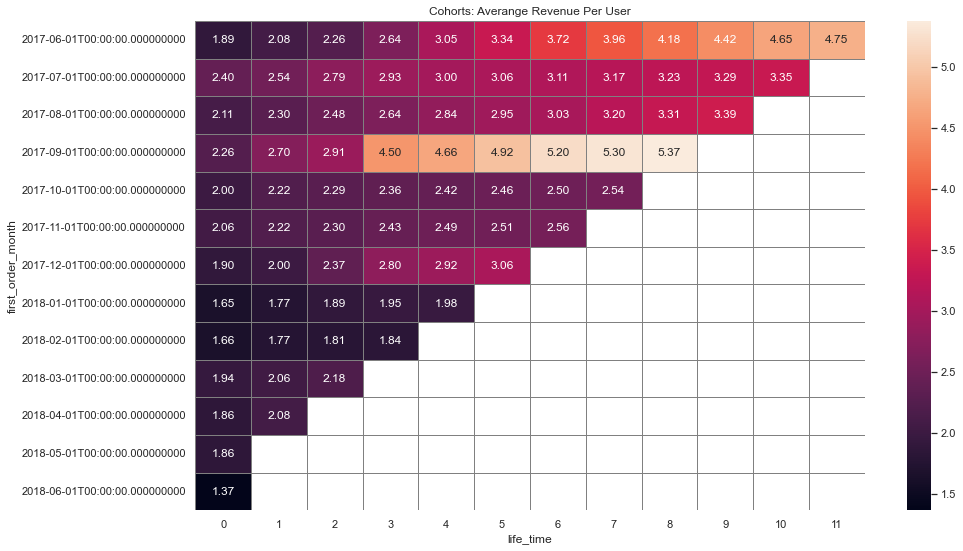

In [54]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: Averange Revenue Per User')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray'); 

In [55]:
output.sum(axis=1)

first_order_month
2017-06-01    40.947581
2017-07-01    32.889560
2017-08-01    28.252800
2017-09-01    37.843561
2017-10-01    18.786687
2017-11-01    16.576997
2017-12-01    15.036454
2018-01-01     9.247324
2018-02-01     7.077579
2018-03-01     6.173500
2018-04-01     3.938717
2018-05-01     1.864225
2018-06-01     1.368000
dtype: float64

In the table above we can see the LTV of each cohort. 

## Calculating and visualising LTV by source



In [56]:
orders_new = orders_new.merge(visits[['Source Id', 'Uid']], on='Uid')
source_ltv = orders_new.groupby(['Source Id']).agg({'Revenue':'sum', 'Uid':'nunique'}).reset_index()
source_ltv['gross_profit'] = source_ltv['Revenue'] * gross_profit
source_ltv['LTV'] = source_ltv['gross_profit']/source_ltv['Uid']
source_ltv

,Source Id,Revenue,Uid,gross_profit,LTV
0,1,2298200.17,7138,919280.068,128.786785
1,2,2638189.21,7305,1055275.684,144.459368
2,3,296687.96,13846,118675.184,8.571081
3,4,496690.17,14253,198676.068,13.939246
4,5,1181477.14,10156,472590.856,46.533168
5,7,1.22,1,0.488,0.488000
6,9,36342.25,2793,14536.900,5.204762
7,10,14619.23,1773,5847.692,3.298191


Platforms/source 1 and 2 brings in the highest revenue, platform 3, 7, and 10 bring in the lowest revenue (platform 7 is the least).



## Investigating customer acquisition cost

In [57]:
total_cost = costs['costs'].sum()
print(f'Yandex spent overall to aquire customer {total_cost}')

Yandex spent overall to aquire customer 329131.62


In [58]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
cost_per_month = costs.groupby('cost_month').agg({'costs':'sum'})
cost_per_month

,costs
cost_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


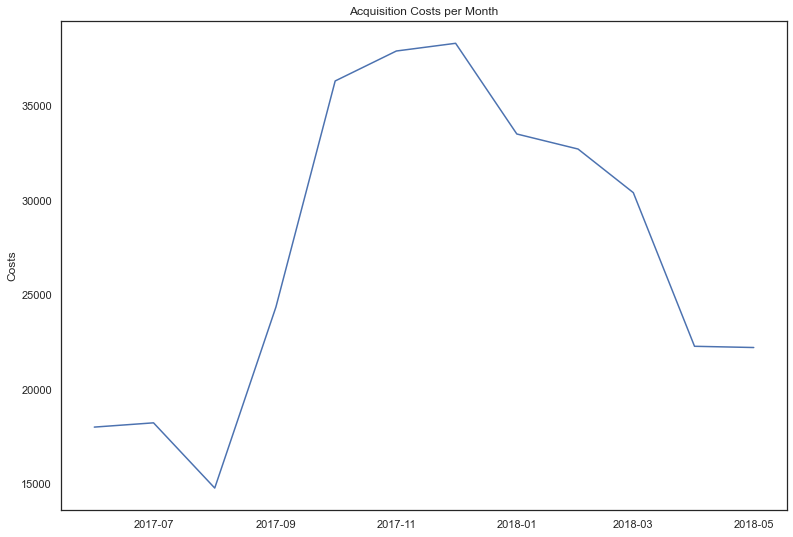

In [59]:
plt.figure(figsize=(13, 9))
plt.title('Acquisition Costs per Month')
plt.plot(cost_per_month)
plt.ylabel('Costs')
plt.show()

The company increased the monthly apending for acquire new customer in the last quarter of the 2017. The monthly spending is decreasing since the 2018.

We can ceck if there is a difference in the acquisition cost for each source

In [60]:
cost_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
cost_per_source['source_id'] = cost_per_source['source_id'].astype(str)
cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


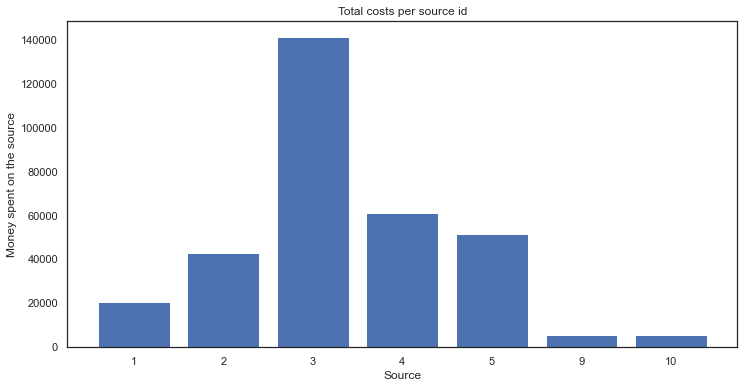

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(cost_per_source['source_id'], cost_per_source['costs'])
plt.xlabel('Source')
plt.ylabel('Money spent on the source')
plt.title('Total costs per source id')
plt.show()

Tthe company has spent substantially more to acquire customers from source 3. Source 2, 4, 5 are substantially similar. The cheapest are source 9 and 10.

We can determine the customer acquisition cost (CAC) that rapresent the cost of acquisition of each single customer

In [62]:
cohorts_cac = orders_new.groupby(['first_order_month']).agg({'Uid':'nunique'}).reset_index()
cohorts_cac = cohorts_cac.merge(cost_per_month, left_on='first_order_month', right_on='cost_month')
cohorts_cac['CAC'] = cohorts_cac['costs'] / cohorts_cac['Uid']
cohorts_cac

,first_order_month,Uid,costs,CAC
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1923,18240.59,9.485486
2,2017-08-01,1370,14790.54,10.796015
3,2017-09-01,2581,24368.91,9.441654
4,2017-10-01,4340,36322.88,8.369327
5,2017-11-01,4081,37907.88,9.288870
6,2017-12-01,4383,38315.35,8.741809
7,2018-01-01,3373,33518.52,9.937302
8,2018-02-01,3651,32723.03,8.962758
9,2018-03-01,3533,30415.27,8.608907


There is not a substantial difference in the cost of acquiring customers belonging to the various cohorts.

We can do the same for sources

In [63]:
cost_per_source['source_id'] = cost_per_source['source_id'].astype(int)
source_cac = orders_new.groupby(['Source Id']).agg({'Uid':'nunique'}).reset_index()
source_cac = source_cac.merge(cost_per_source, left_on='Source Id', right_on='source_id')
source_cac['CAC'] = source_cac['costs'] / source_cac['Uid']
source_cac[['Source Id', 'CAC']]

,Source Id,CAC
0,1,2.918642
1,2,5.859828
2,3,10.206676
3,4,4.284965
4,5,5.096209
5,9,1.975471
6,10,3.283976


Sources 2, 9, and 10 allow the company to acquire new customers at a lower price if compared to other sources.

## Return on marketing investment (ROMI)

### ROMI per cohorts

In [64]:
# determining ROMI per cohorts
cohorts_romi = cohorts_cac.merge(cohorts_ltv, on='first_order_month')
cohorts_romi['ROMI'] = cohorts_romi['LTV']/cohorts_romi['CAC']

In [65]:
output = cohorts_romi.pivot_table(
    index='first_order_month', 
    columns='life_time', 
    values='ROMI', 
    aggfunc='mean').cumsum(axis=1)





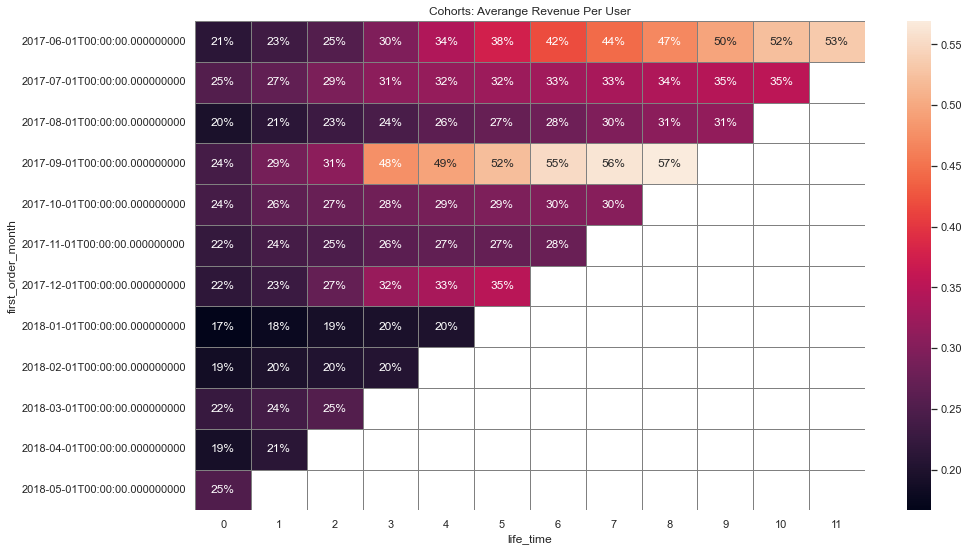

In [66]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: Averange Revenue Per User')
sns.heatmap(output, annot=True, fmt='.0%', linewidths=1, linecolor='gray'); 

Cohorts usually pay off the investiment on the 3rd month, only the cohorts 2017-11 and 2018-02 and paid off on the 4th month. 

While the cohort 2017-09 paid off already on the 2nd month.

### ROMI per source

In [67]:
# determining ROMI per Source
merged = source_cac.merge(source_ltv, on='Source Id')
merged['ROMI'] = merged['LTV']/merged['CAC']
merged[['Source Id', 'ROMI']]

,Source Id,ROMI
0,1,44.125577
1,2,24.652495
2,3,0.839752
3,4,3.253060
4,5,9.130938
5,9,2.634694
6,10,1.004328


Source 1 and 2 have a much higher ROMI than the others

# Step 3. Conclusion and Recommendations

**Conclusion**

- On average, about 907 people use Yandex Afisha every day, about 5621 people use Yandex Afisha every week, and about 23228 people use Yandex Afisha every month.
- The highest daily visits occur on a black friday and the lowest daily visits occur on a holiday
- On average, there is about 1 session per day, and each session lasts about 60 seconds.
- By the first month (month 1), all cohorts had retention rates less than 10%. 
- On average, people start buying within 0 minutes (immediately), and the average purchase size is about 5.00 dollars.
- The June 2017 cohort contributed the longest time but the September 2017 cohort had the highest LTV. May and June 2018 cohorts had the least LTVs.
- CAC per month/cohorts shows a uniform but different costs for each cohort.The August 2017 cohort had the highest cost in a given month while the May 2018 cohort had the least.
- Users of platforms/source 1 and 2 bring in the highest revenue, and users of platform 7 bring in the least.
- Plaform 3 has the highest cost but it is amongst the least revenue generators.
- Platforms 1 and 2 brings in the highest revenue, and amongst the least in cost. They are the most profitable platforms.
- The investments in all the sources are not yet worthwhile as the highest (source 1) is yet to recoup 100% of investment. Also, investments by the cohorts are not yet worthwhile.


**Recommendations**

I would recommend the marketing experts to invest more in sources 1 and 2 and cut costs in plaform 3. Without plaform 3, revenues would exceed cost by about 64K dollars ~ profitability
Introduce strategies to boost rentention rate; improve user experience with the app.